<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# The Jupyter Notebook created by Uygar Aras for IE-423 course Task 3

---



# Initialization

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Fetching

In [3]:
dfMlb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/black_friday/train.csv')

# Data Preprocessing

In [4]:
# Handle missing values in the dataset
dfMlb.fillna(-1, inplace=True)

# Convert categorical variables to numerical
dfMlb['Gender'] = dfMlb['Gender'].map({'M': 0, 'F': 1})
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
dfMlb['Age'] = dfMlb['Age'].map(age_mapping)
city_mapping = {'A': 0, 'B': 1, 'C': 2}
dfMlb['City_Category'] = dfMlb['City_Category'].map(city_mapping)
dfMlb['Stay_In_Current_City_Years'] = dfMlb['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

Features and Target

In [5]:
X = dfMlb.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = dfMlb['Purchase']

In [27]:
# Select numeric features
cols_num = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
Xnum = X[cols_num]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=-1)
Xnum_imputed = imputer.fit_transform(Xnum)
Xnum_imputed_df = pd.DataFrame(Xnum_imputed, columns=Xnum.columns)
X_train, X_test, y_train, y_test = train_test_split(Xnum_imputed_df, y, test_size=0.2, random_state=42)

**Split numeric features into training and test sets**


In [7]:
Xnum_train, Xnum_test, y_train, y_test = train_test_split(Xnum_imputed_df, y, train_size=0.8, test_size=0.2, random_state=1)

# Function for building and scoring Random Forest models

In [8]:
def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRfsMlb = RandomForestRegressor(random_state=1)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return mae

In [9]:
# Calculate Mean Absolute Error (using the imputed data)
mae = get_random_forest_mae(Xnum_train, Xnum_test, y_train, y_test)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2215.5708974662803


# Visualizations

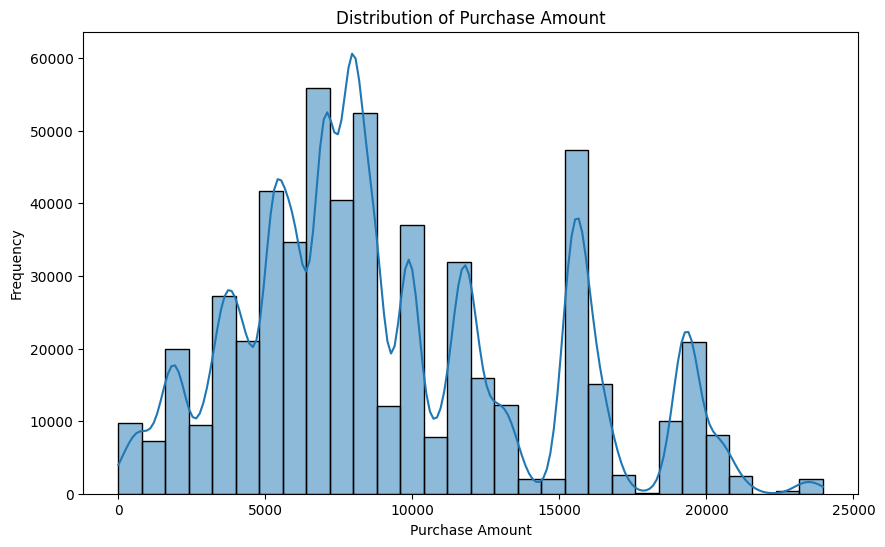

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(dfMlb['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

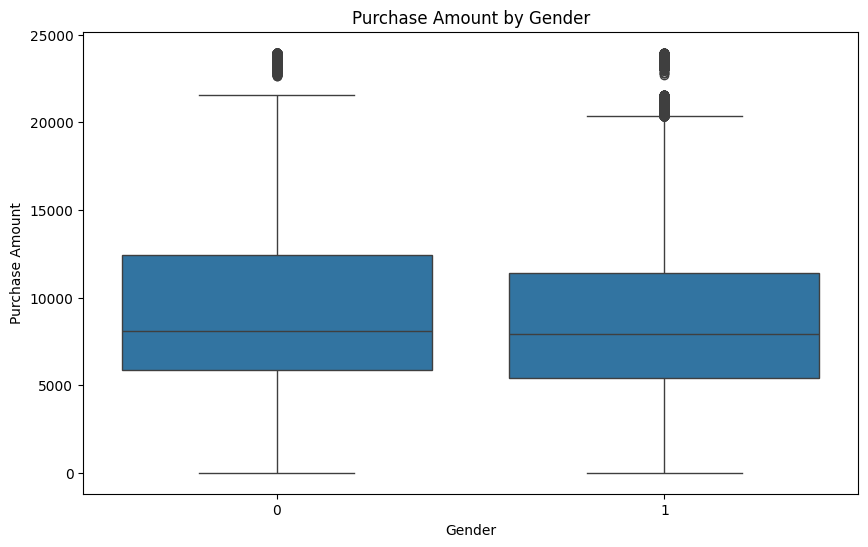

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=dfMlb)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

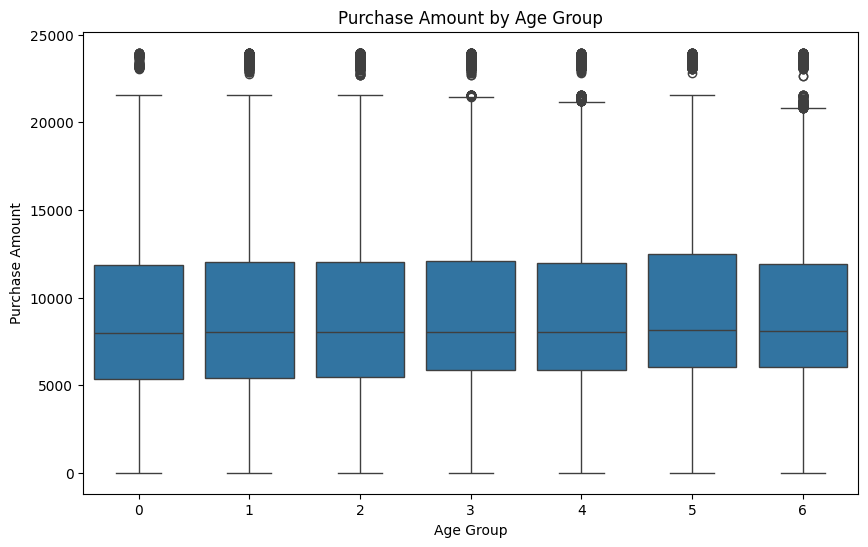

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=dfMlb)
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

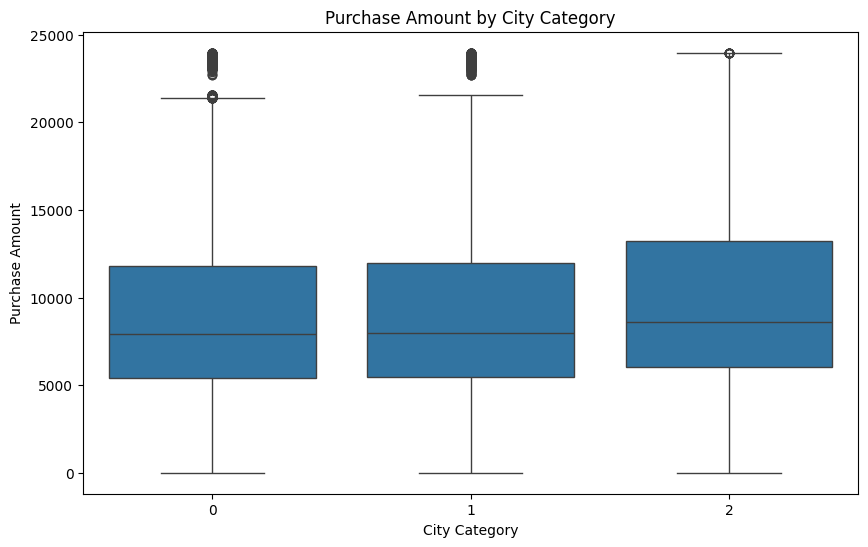

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_Category', y='Purchase', data=dfMlb)
plt.title('Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()

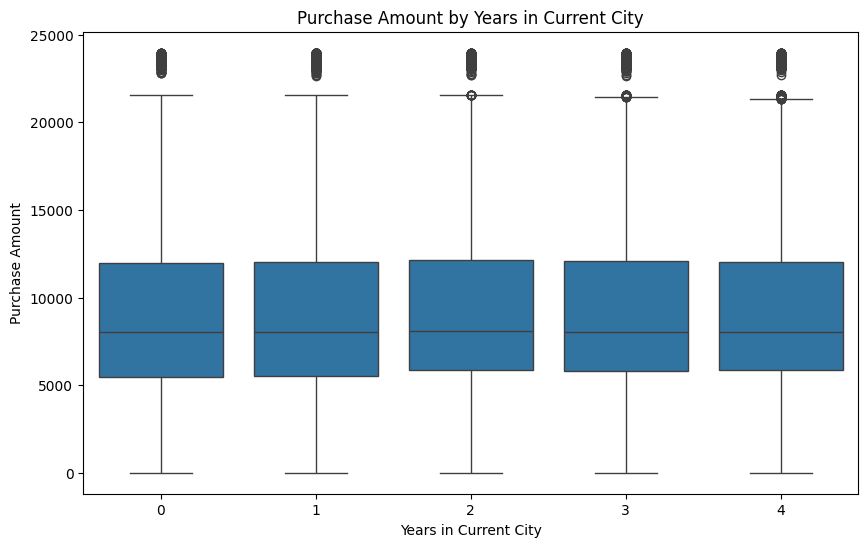

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=dfMlb)
plt.title('Purchase Amount by Years in Current City')
plt.xlabel('Years in Current City')
plt.ylabel('Purchase Amount')
plt.show()

#Feature Importance

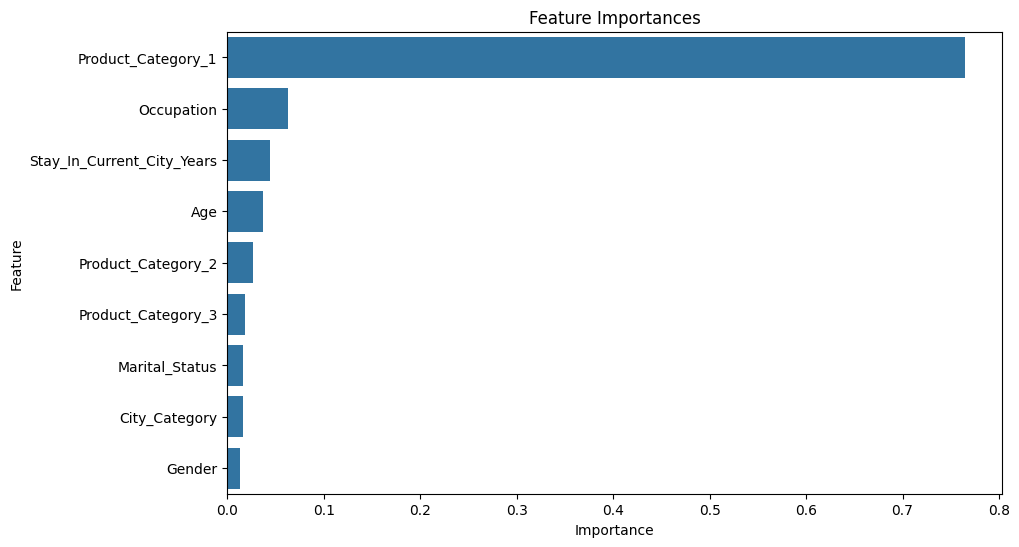

In [16]:
# Feature Importance
model = RandomForestRegressor(random_state=1)
model.fit(Xnum_train, y_train)
importances = model.feature_importances_
feature_names = Xnum_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Pair Plot

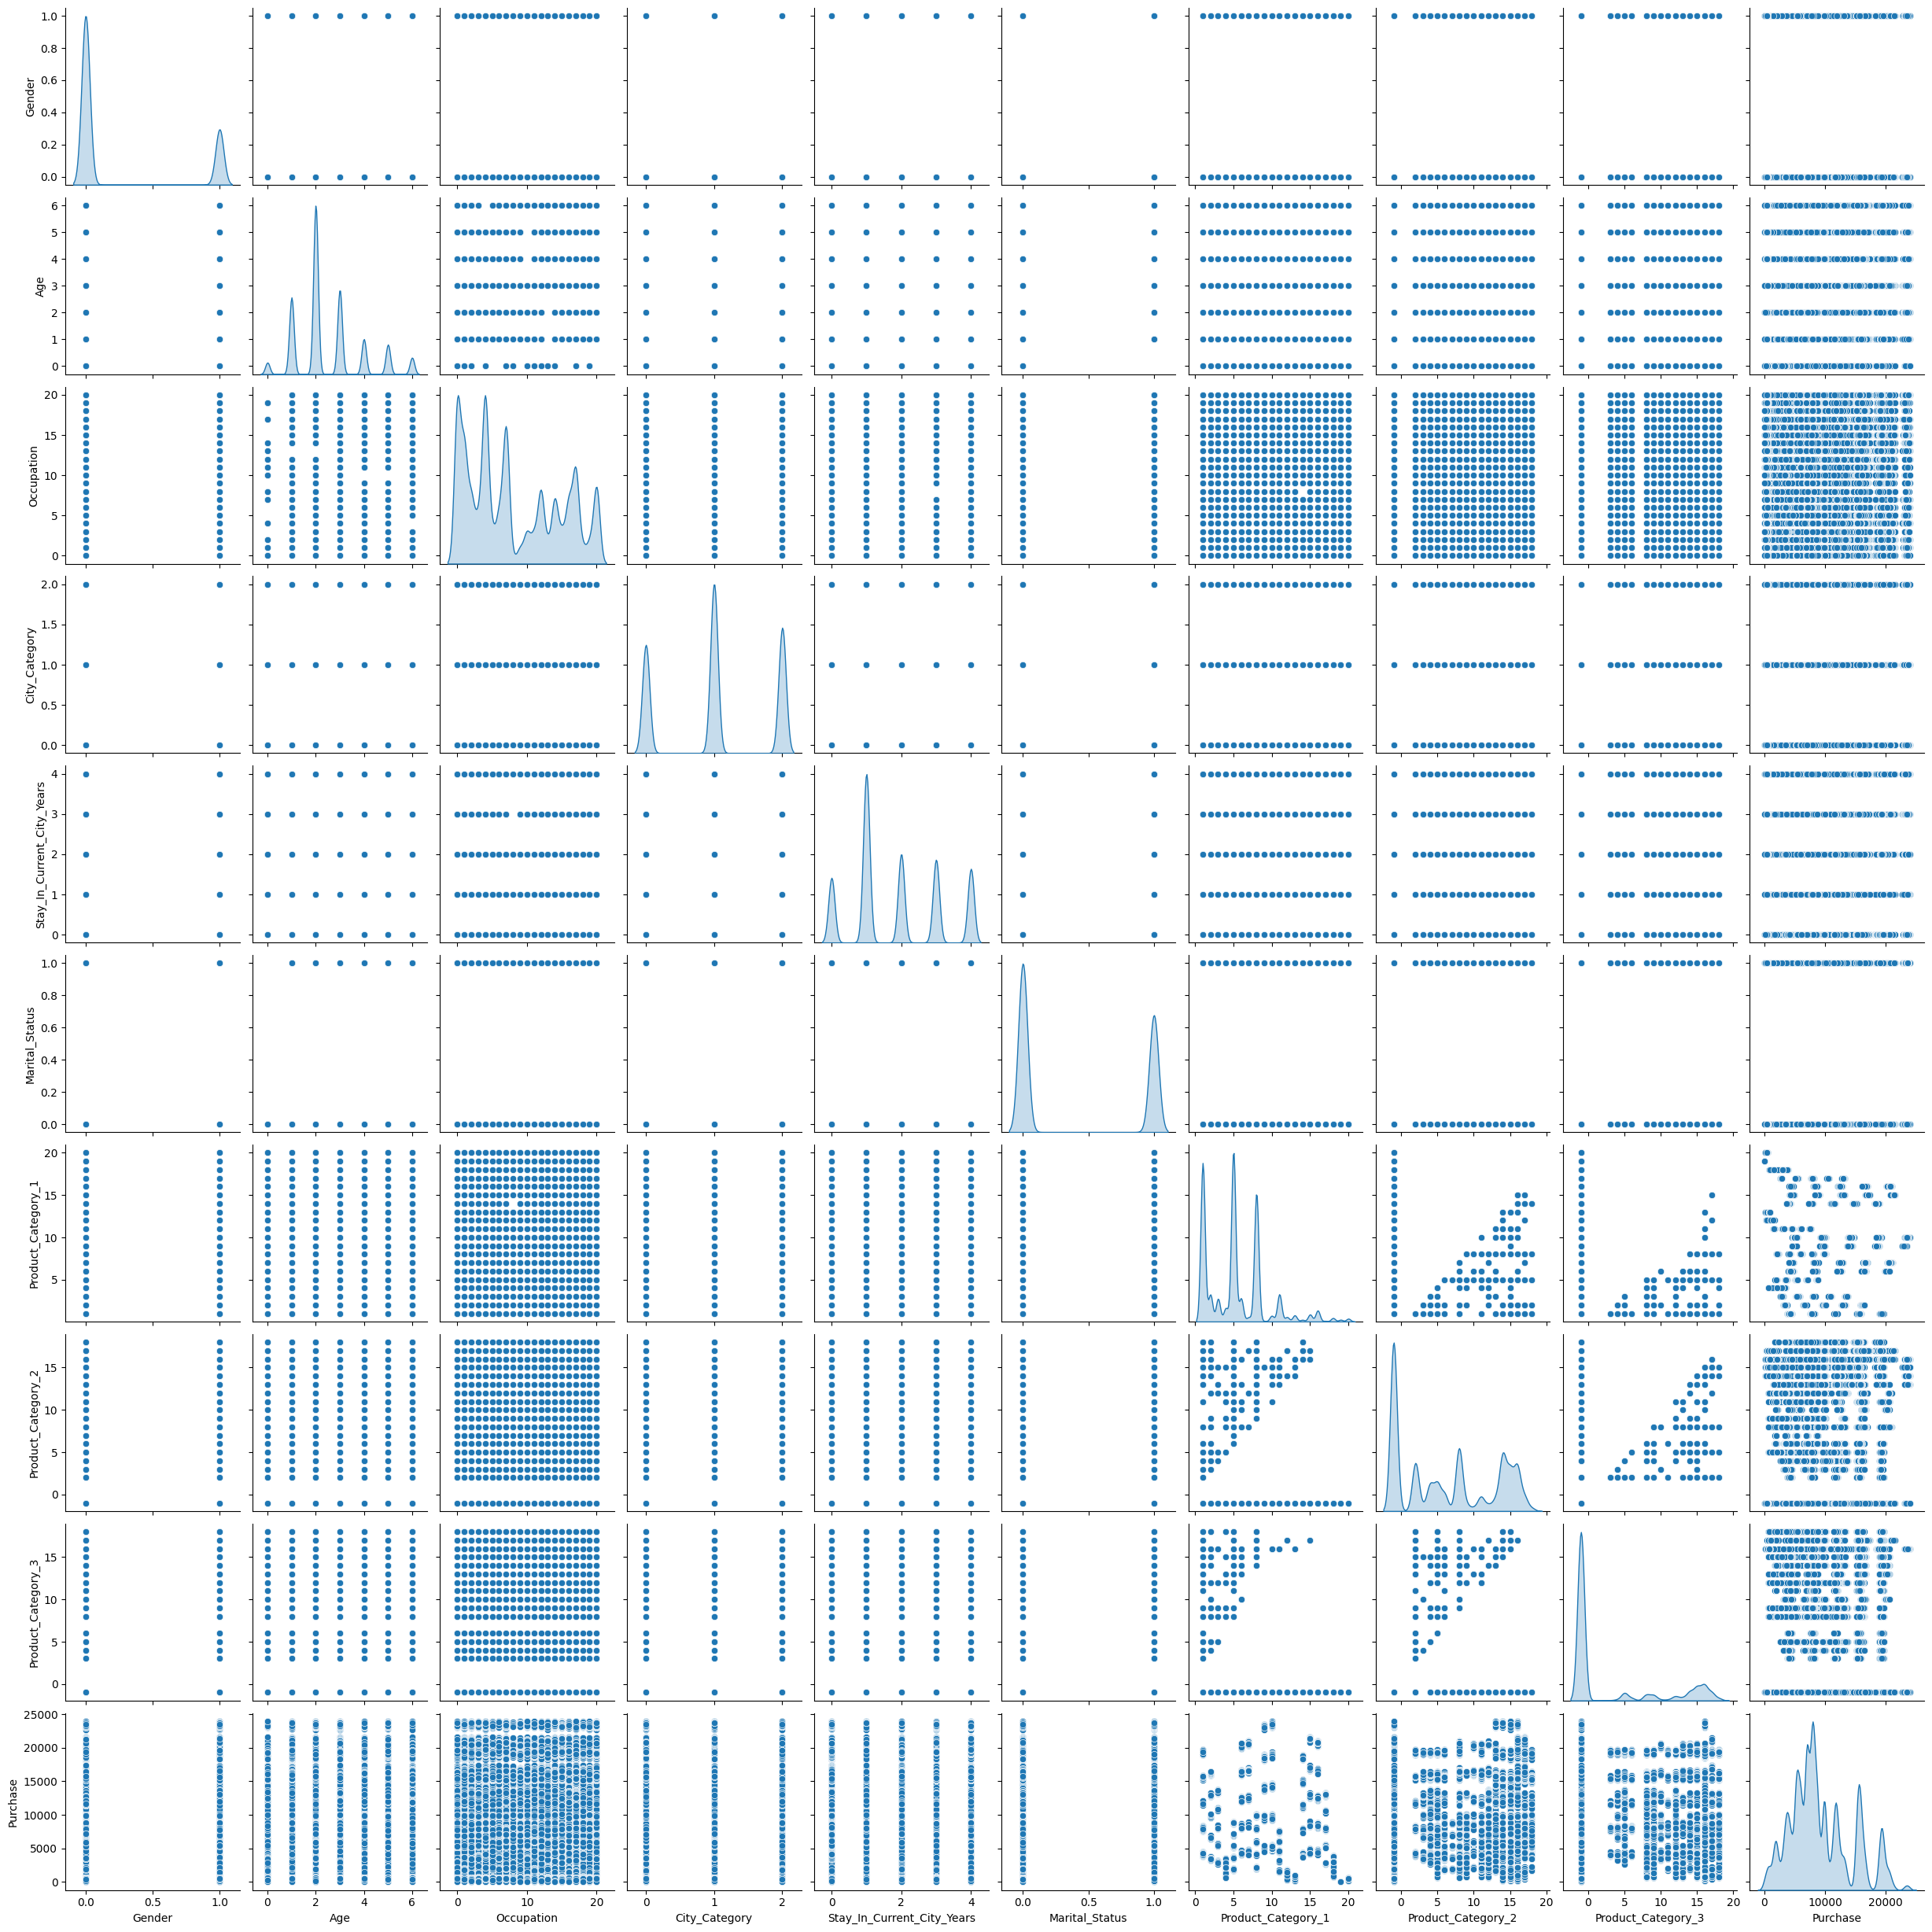

In [17]:
sns.pairplot(dfMlb[cols_num + ['Purchase']], diag_kind='kde')
plt.show()

**Heatmap for Missing Values**

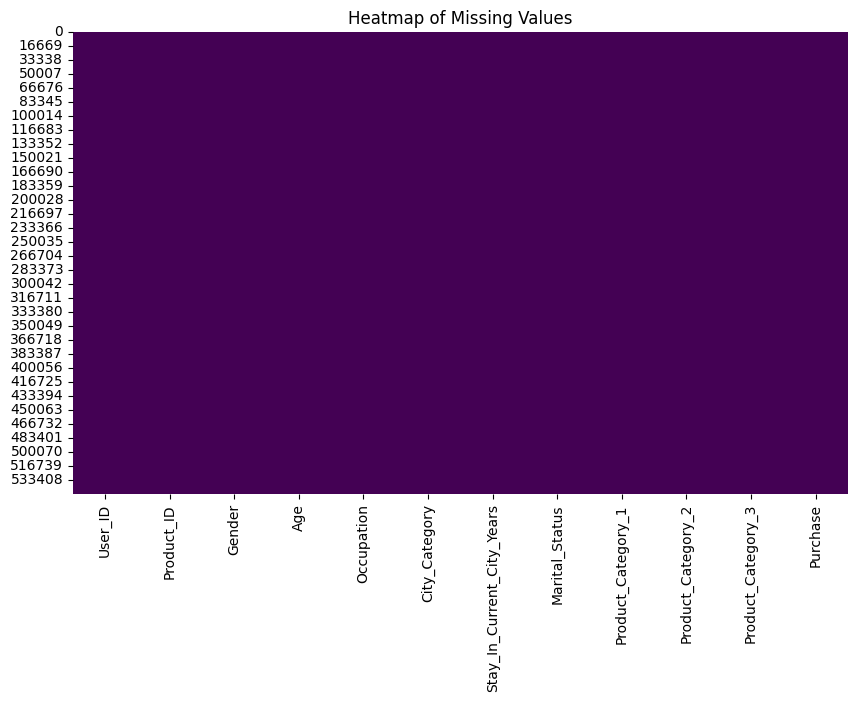

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(dfMlb.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

**Cluster Analysis**

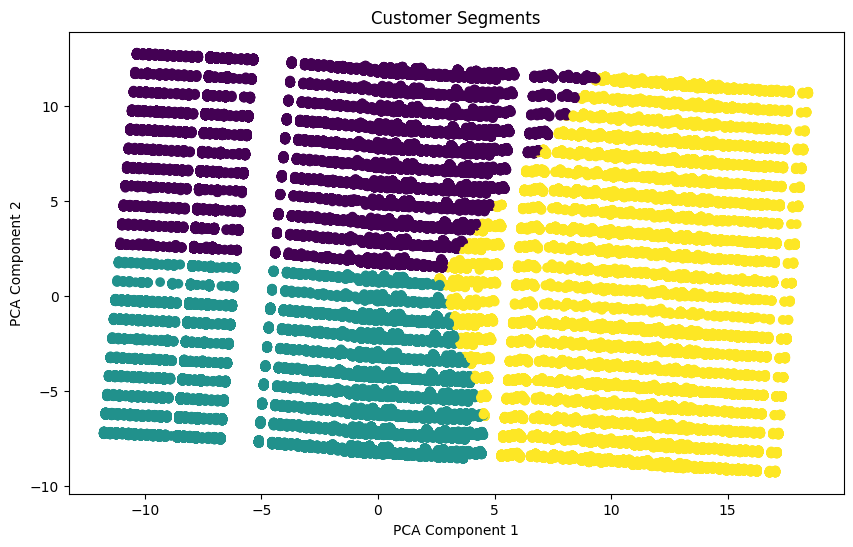

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xnum_imputed_df)
kmeans = KMeans(n_clusters=3, random_state=1)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Display key statistics

In [20]:
# Display key statistics
key_stats = dfMlb.describe()
print(key_stats)

            User_ID         Gender            Age     Occupation  \
count  5.500680e+05  550068.000000  550068.000000  550068.000000   
mean   1.003029e+06       0.246895       2.496430       8.076707   
std    1.727592e+03       0.431205       1.353632       6.522660   
min    1.000001e+06       0.000000       0.000000       0.000000   
25%    1.001516e+06       0.000000       2.000000       2.000000   
50%    1.003077e+06       0.000000       2.000000       7.000000   
75%    1.004478e+06       0.000000       3.000000      14.000000   
max    1.006040e+06       1.000000       6.000000      20.000000   

       City_Category  Stay_In_Current_City_Years  Marital_Status  \
count  550068.000000               550068.000000   550068.000000   
mean        1.042640                    1.858418        0.409653   
std         0.760211                    1.289443        0.491770   
min         0.000000                    0.000000        0.000000   
25%         0.000000                    1.00000

In [21]:
# Count number of missing values in each column of the training data
Xnum_train.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

**Identify columns with missing values and then drop such columns**

In [22]:
cols_num_null = [col for col in Xnum_train.columns
    if Xnum_train[col].isnull().any()]
Xnum_train_drpnull = Xnum_train.drop(cols_num_null, axis=1)
Xnum_test_drpnull = Xnum_test.drop(cols_num_null, axis=1)

In [23]:
print('MAE from Approach 1 (Drop features with missing values):')
print(get_random_forest_mae(Xnum_train_drpnull, Xnum_test_drpnull, y_train, y_test))

MAE from Approach 1 (Drop features with missing values):
2215.5708974662803


In [24]:
# Replace with mean value
Xnum_train_repnull = Xnum_train.fillna(Xnum_train.mean())
Xnum_test_repnull = Xnum_test.fillna(Xnum_train.mean())

print('MAE from Approach 2 (Replace missing values with mean):')
print(get_random_forest_mae(Xnum_train_repnull, Xnum_test_repnull, y_train, y_test))

MAE from Approach 2 (Replace missing values with mean):
2215.5708974662803


**Going forward, let us replace all missing numeric values with the column mean**

In [28]:
X_train[cols_num]=Xnum_train_repnull[cols_num]
X_test[cols_num]=Xnum_test_repnull[cols_num]

**Select non-numeric features**

In [29]:
cols_obj = [col for col in X.columns if X[col].dtype == 'object']
cols_obj

[]

**Label encoding on all non-numeric features**

In [30]:
from sklearn.preprocessing import LabelEncoder

Xle_train = X_train.copy()
Xle_test = X_test.copy()
# Apply label encoder to each column with non-numeric data
label_encoder = LabelEncoder()
for col in cols_obj:
    Xle_train[col] = label_encoder.fit_transform(X_train[col])
    Xle_test[col] = label_encoder.transform(X_test[col])

**Select categorical features**

In [31]:
cols_cat = [col for col in X.columns if X[col].dtype == 'object' and X[col].nunique() < 10]

**Handle missing values before label encoding**

In [32]:
X_train.fillna(X_train.mode().iloc[0], inplace=True) # Fill missing values with mode for each column
X_test.fillna(X_test.mode().iloc[0], inplace=True)

**Label encoding on only categorical features**

In [33]:
from sklearn.preprocessing import LabelEncoder

Xle_train = X_train.copy()
Xle_test = X_test.copy()

label_encoder = LabelEncoder()
for col in cols_cat:
    Xle_train[col] = label_encoder.fit_transform(X_train[col])
    Xle_test[col] = label_encoder.transform(X_test[col])

**Encode and Build/Score using all Categorical columns**

In [34]:
mae = get_random_forest_mae(Xle_train[cols_num + cols_cat], Xle_test[cols_num + cols_cat], y_train, y_test)
print("MAE from Label Encoding all Categorical columns:")
print(mae)

MAE from Label Encoding all Categorical columns:
3693.2108520540432


**Build and Score default Gradient Boosting Model**

In [35]:
from xgboost import XGBRegressor

mdlXgbMlb = XGBRegressor()
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from default XGBoost model:")
print(mae)

MAE from default XGBoost model:
3673.2669095965584


**Build and score a tuned Gradient Boosting Model**

In [37]:
mdlXgbMlb = XGBRegressor(n_estimators=5000, learning_rate=0.01, max_depth=5)
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

MAE from tuned XGBoost model:
3673.739131091428


Select features for clustering and then scale those features

In [40]:
from sklearn.preprocessing import StandardScaler
# Select features for clustering
features = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
X = dfMlb[features]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

**Apply PCA for dimensionality reduction**

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Purchase'] = dfMlb['Purchase']
pca_df.head()

,PCA1,PCA2,Purchase
0,0.540209,-2.288903,8370
1,-1.955606,-2.215631,15200
2,2.600609,-2.202822,1422
3,2.156917,-2.112931,1057
4,0.904868,1.970839,7969


Apply K-means Clustering

In [42]:
kmeans = KMeans(n_clusters=3, random_state=1)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the DataFrame
pca_df['Cluster'] = clusters
pca_df.head()

,PCA1,PCA2,Purchase,Cluster
0,0.540209,-2.288903,8370,0
1,-1.955606,-2.215631,15200,1
2,2.600609,-2.202822,1422,0
3,2.156917,-2.112931,1057,0
4,0.904868,1.970839,7969,2


**Visualize clusters**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


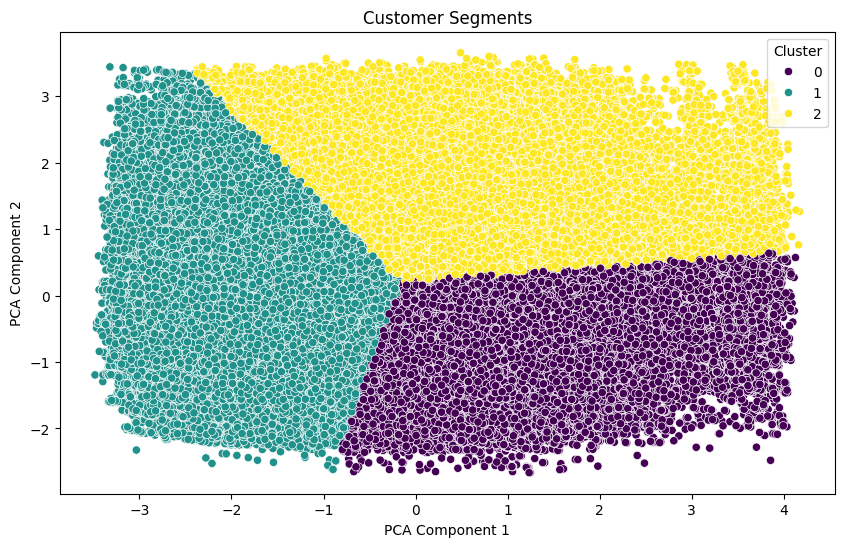

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**Analyze clusters by purchase amount**

Cluster
0     6750.443789
1    13430.285101
2     7867.928950
Name: Purchase, dtype: float64


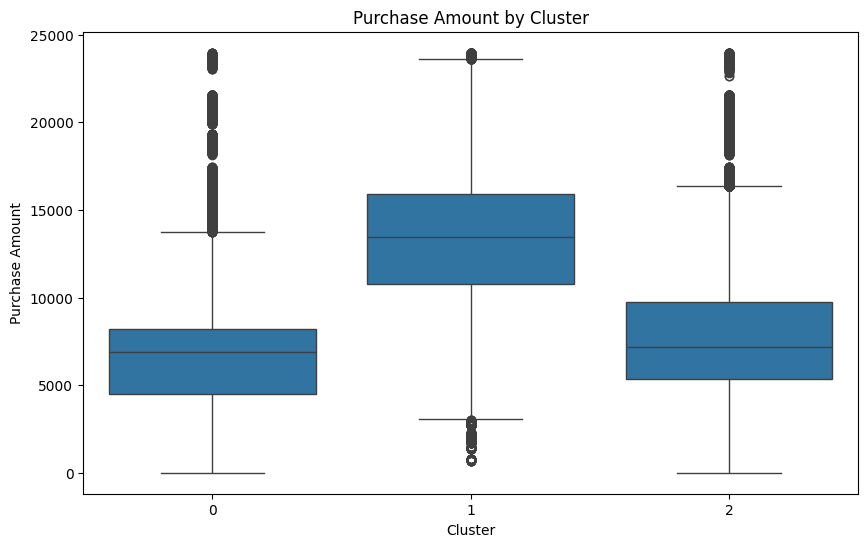

In [44]:
cluster_analysis = pca_df.groupby('Cluster')['Purchase'].mean()
print(cluster_analysis)

# Boxplot of purchase amounts by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Purchase', data=pca_df)
plt.title('Purchase Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Amount')
plt.show()

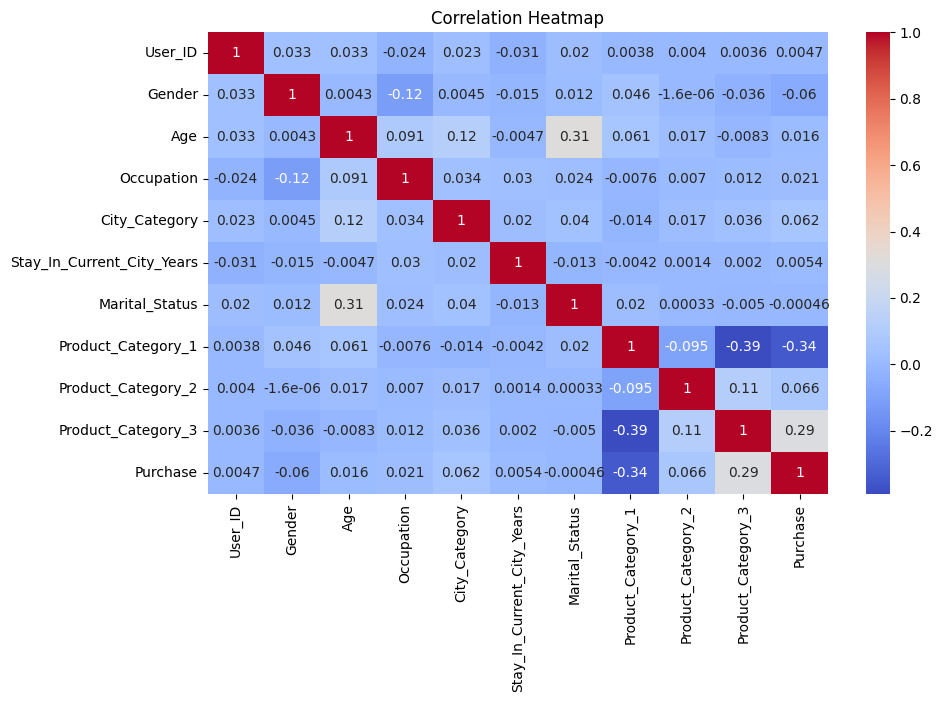

In [15]:
# Drop non-numeric columns before calculating correlation
numeric_df = dfMlb.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Summary and insights

In [46]:
# Summary and insights
print("### Summary of Key Findings ###")
print("1. Feature Importances:")
print(feature_importances)

print("\n2. Cluster Analysis:")
print(cluster_analysis)

print("\n### Key Insights ###")
print("1. The most important features influencing purchase amounts are:", feature_importances.index[:5].tolist())
print("2. There are three distinct customer segments with different purchase behaviors:")
print("   - Cluster 0: Low average purchase amount")
print("   - Cluster 1: High average purchase amount")
print("   - Cluster 2: Moderate average purchase amount")
print("3. Correlation analysis shows significant relationships between features such as Age, City Category, and Purchase Amount.")

### Summary of Key Findings ###
1. Feature Importances:
Product_Category_1            0.765162
Occupation                    0.063182
Stay_In_Current_City_Years    0.043893
Age                           0.037530
Product_Category_2            0.026303
Product_Category_3            0.017993
Marital_Status                0.016712
City_Category                 0.015847
Gender                        0.013378
dtype: float64

2. Cluster Analysis:
Cluster
0     6750.443789
1    13430.285101
2     7867.928950
Name: Purchase, dtype: float64

### Key Insights ###
1. The most important features influencing purchase amounts are: ['Product_Category_1', 'Occupation', 'Stay_In_Current_City_Years', 'Age', 'Product_Category_2']
2. There are three distinct customer segments with different purchase behaviors:
   - Cluster 0: Low average purchase amount
   - Cluster 1: High average purchase amount
   - Cluster 2: Moderate average purchase amount
3. Correlation analysis shows significant relationships betwe



---

#**And that was the last analysis for this notebook**


---